In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
sns.set()
import plotly
df = pd.read_csv('evfiyati.csv') 
df = pd.DataFrame(df)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [3]:
from sklearn import preprocessing
df["MSSubClass"] = df["MSSubClass"].astype("float")

In [4]:
df_new = df.drop(["Id","SalePrice"], axis=1)

In [5]:
ohe = preprocessing.OneHotEncoder()
data6 = pd.get_dummies(df_new)

In [6]:
data6

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7,5.0,2003,2003,196.0,4,3,...,0,0,0,1,0,0,0,0,1,0
1,20.0,80.0,9600.0,2,3.5,1976,1976,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
2,60.0,68.0,11250.0,7,3.5,2001,2002,162.0,4,3,...,0,0,0,1,0,0,0,0,1,0
3,70.0,60.0,9550.0,7,3.5,1915,1970,0.0,3,3,...,0,0,0,1,1,0,0,0,0,0
4,60.0,84.0,14260.0,8,5.0,2000,2000,350.0,4,3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6,5.0,1999,2000,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
1456,20.0,85.0,13175.0,6,6.0,1978,1988,119.0,3,3,...,0,0,0,1,0,0,0,0,1,0
1457,70.0,66.0,9042.0,7,7.5,1941,2006,0.0,5,3,...,0,0,0,1,0,0,0,0,1,0
1458,20.0,68.0,9717.0,5,6.0,1950,1996,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0


In [7]:
scaler = StandardScaler()
scaler.fit(data6)

data7 = pd.DataFrame(scaler.transform(data6), index=data6.index, columns=data6.columns)

In [8]:
y = df[['SalePrice']]
X = data7

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:

from xgboost import XGBRegressor
import xgboost as xgb

In [11]:
model = XGBRegressor(n_estimators=1150, max_depth=5, eta=0.03, subsample=0.5, colsample_bytree=0.8)

In [12]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.03, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.0299999993,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1150, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
import pickle 

In [14]:
filename = 'finalized_model.model'
pickle.dump(model, open(filename, 'wb'))

In [15]:
pred = model.predict(X_test)

In [16]:
X_test.shape

(438, 223)

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(sqrt(mean_squared_error(y_test, pred)))

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))
print(mae(y_test,pred))
r_squared = model.score(X_test, y_test)
print(r_squared)

17707.171609389614
73211.4683751023
0.9329069094613079


<AxesSubplot:>

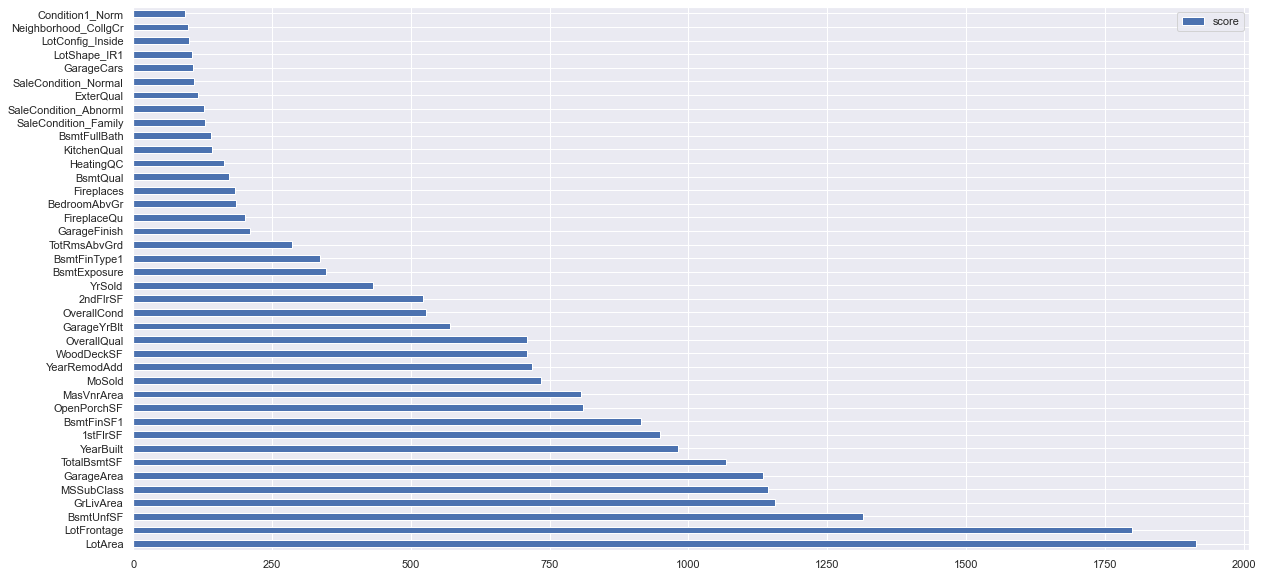

In [18]:
feature_important = model.get_booster().get_score(importance_type='weight') 
keys = list(feature_important.keys()) 
values = list(feature_important.values())
 
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False) 
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [35]:
first_twenty_index = list(data.index[:20])

In [43]:
for x in range(len(first_twenty_index)):
    print(f"{first_twenty_index[x]} unique values are : {df[first_twenty_index[x]].describe()}")

LotArea unique values are : count     1460.000000
mean      9637.998973
std       3611.208740
min       1413.375000
25%       7526.250000
50%       9475.000000
75%      11601.500000
max      17714.375000
Name: LotArea, dtype: float64
LotFrontage unique values are : count    1460.000000
mean       70.045918
std        18.413270
min        30.000000
25%        60.000000
50%        70.049958
75%        80.000000
max       110.000000
Name: LotFrontage, dtype: float64
BsmtUnfSF unique values are : count    1460.000000
mean      563.777740
std       431.710214
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      1685.500000
Name: BsmtUnfSF, dtype: float64
GrLivArea unique values are : count    1460.000000
mean     1503.735873
std       481.375641
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      2747.625000
Name: GrLivArea, dtype: float64
MSSubClass unique values are : count    1460.000000
mean       56.897260

In [49]:
for x in range(len(first_twenty_index)):
    print(f"{first_twenty_index[x]} unique values are : {df[first_twenty_index[x]].unique()}")

LotArea unique values are : [ 8450.  9600. 11250. ... 17217. 13175.  9717.]
LotFrontage unique values are : [ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          72.          66.         101.
  30.          44.         110.          98.          47.
  31.5        108.          74.          61.          48.
  33.          52.         100.          89.          63.
  76.          81.          95.          69.          32.
  78.          40.         105.          73.          77.
  64.          94.         107.5         55.          71.
 107.          92.          62.          86.          97.
  54.          90.          41.          79.          99.
  67.          83.          43.          57.         103.
  82.          93.          88.          34.          35.
  37.          87.          49.          96.          59.
  36.          56.         102.          58.          38.
 109.          53.    